## Clustering Analaysis
#### Continued

- **Hierarchical clustering**, alternative approach to prototype-based clustering.
- Allows us to plot **dendrograms** (visualizations of a binary hierarchical clustering)
- Do not need to specify the number of clusters upfront (i.e k=2)  


- Two main approaches to hierarchical clustering are
    - **Agglomerative;** start with each sample as an individual cluster, merge the closest pairs of clusters until only one cluster remains
    - **Divisive;** start with one cluster, iteratively split into smaller clusters until each cluster contains one sample.
    
    
- Two standard algorithms for aggolmerative hierarchical clustering are
    - **Single linkgage;** Compute distances between the most similar members for each pair of clusters and merge the two clusters for which the distance between the most similar members is the smallest.
    - **Complete linkgage;** Similar, instead of comparing most similar members, we compare the most dissimilar members to perform the merge.
    - Also average linkgage and Ward's linkgage
    


### Example of Agglomerative using Complete Linkgage algorithm 

1) Compute the distance matrix of all samples  
2) Represent each data point as a singleton cluster.  
3) Merge the two closest clusters based on the distance of the most dissimilar (distant) members.  
4) Update the distance matrix  
5) Repeat steps 2 to 4 until one single cluster remains  

In [3]:
# Generate some random sample data to work with

import pandas as pd
import numpy as np

np.random.seed(123)

# Features
variables = ['X', 'Y', 'Z']

# Rows
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

# Randomly generate numbers, 5 Rows, 3 Columns
X = np.random.random_sample([5,3])*10 

df = pd.DataFrame(X, columns=variables, index=labels)

df.head(5)

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [4]:
# Calculate distance matrix, use pdist function from Scipy's submodule

from scipy.spatial.distance import pdist, squareform

# Calculate the Euclidean distance between each pair of sample points 
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)

row_dist.head(5)

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [10]:
# Apply the complete linkgage agglomeration to our cluster

from scipy.cluster.hierarchy import linkage

# View documentation
# help(linkage)

In [6]:
# Correcct approach, use the condensed distance matrix

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')

In [9]:
# Take a look at the clustering results

pd.DataFrame(row_clusters, columns=['row label 1', 
                                    'row label 2', 
                                    'distance', 
                                    'no. of items in clust.'],
             
            index=['cluster %d' % (i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


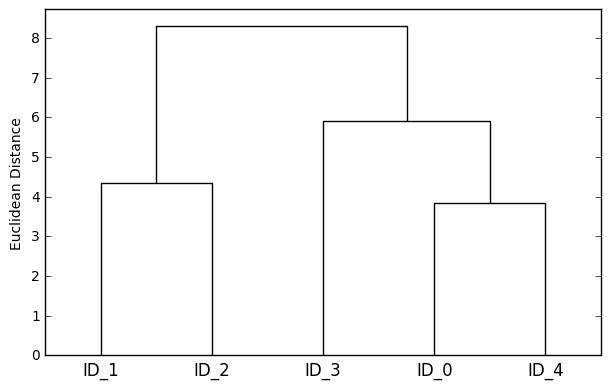

In [22]:
# Visualize the results in the form of a dendrogram
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import set_link_color_palette

set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, labels=labels, color_threshold=np.inf)

plt.tight_layout()
plt.ylabel('Euclidean Distance')
plt.show()

We can see that the samples, ID_0 and ID_4, followed by ID_1 and ID_2, are the most similar ones based on the Euclidean distance metric.

### Example of attaching Dendrograms to a Heatmap

- Allows us to represent the individual values in the sample matrix with a color code. 

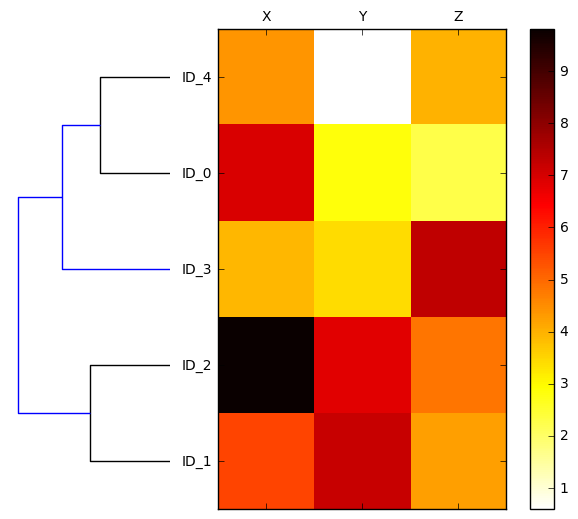

In [23]:
# Create new figure objec
fig = plt.figure(figsize=(8,8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# Rotate the dendrogram 90 degrees counter-clockwise
row_dendr = dendrogram(row_clusters, orientation='left')

# Reorder the data in our df according to the clustering labels retrieved from the 'leaves' key
df_rowclust = df.ix[row_dendr['leaves'][::-1]]

# COnstruct heatmap from the df and position it right next to the dendrogram
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

# Aesthetics, remove ticks
axd.set_xticks([])
axd.set_yticks([])

# Hiding the axis spines
for i in axd.spines.values():
    i.set_visible(False)
    
# Color bar and reassign the feature and sample names to x and y labels
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

plt.show()

### Example of using scikit-learn for agglomerative clustering

In [24]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)

print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


First, fourth, and fifth sample (ID_0, ID_3, ID_4) are assigned to cluster 0.  
Second, third (ID_1, ID_2) are assigned to cluster 1.